In [4]:
#create a 64x64 image
import random

def main():
    line1 = "P3"
    line2 = "#Image 1"
    line3 = "64 64"
    line4 = "255"
    rgb_val = f"{line1}\n{line2}\n{line3}\n{line4}\n"

    for i in range(64):
        for j in range(64):
            random_r = random.randint(0, 255)
            random_g = random.randint(0, 255)
            random_b = random.randint(0, 255)
            
            if i == 63 and j == 63:
                rgb_val += f"{random_r}\n{random_g}\n{random_b}"
            else:
                rgb_val += f"{random_r}\n{random_g}\n{random_b}\n"

    with open("image.ppm", "w") as fileOut:
        fileOut.write(rgb_val)

if __name__ == "__main__":
    main()

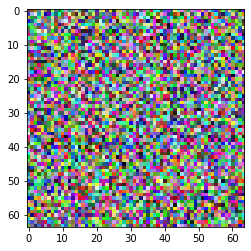

In [63]:
import numpy as np
from scipy import fft
import cv2
import itertools
from imageio import imread, imwrite
import matplotlib.pyplot as plt

#read in image
filename = "image.ppm"
image = imread(filename)

#extracting RBG channels
red, green, blue = cv2.split(image)

#dividing into blocks of 8
#imgBlocks = [red[j:j+8, i:i+8]-128 for (j,i) in itertools.product(range(0,64,8),range(0,64,8))]

arr = fft.dct(red, type=2)
r, c = arr.shape

#inserting the username into the red channel
username = np.array([1, 2, 3, 4, 5, 6, 7, 8])  #example username with 8 characters

for i in range(username.shape[0]):
    arr[r-1, c-1] = username[i]
    c -= 1
    if c == 0:
        c = arr.shape[1]
        r -= 1
        
#converting back to the spatial domain        
encoded_red = fft.idct(arr, type=2)

#changing to integers
encoded_red = (np.rint(encoded_red)).astype(int)

#adding in the encoded red channel
encoded_image = [blue, green, encoded_red]

#imwrite("encoded.ppm", encoded_image, format = "RGB")

newimage = image.copy()
newimage[:, :, 0] = encoded_red  # Assuming the red channel is modified

plt.imshow(image)
plt.savefig('dct_original.png', dpi=300)
plt.imshow(newimage)
plt.savefig('dct_encoded.png', dpi=300)
